<a href="https://colab.research.google.com/github/JoshFowlkes/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Sprint-Challenge1/Josh_Fowlkes_DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd

## Importing Data Set:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving haberman.data to haberman (1).data


## Assessing that it has the appropirate number of observations:

In [3]:
df = pd.read_csv('haberman.data')
df.head(5)

# The header is the first row, so will have to fix

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [4]:
df.count()
# UCI says theres 306 instances, but here we have 305, the issue is obviously the header
# will address in following cell

30     305
64     305
1      305
1.1    305
dtype: int64

In [5]:
df = pd.read_csv('haberman.data', header=None)
df.head()
# boom boom header issue solved

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Now to assess if there are missing values:

In [6]:
df.isnull().sum()
# awesome sauce, there are no NaN values, will take a further look just to be sure there are 
# no fake missing values

0    0
1    0
2    0
3    0
dtype: int64

In [7]:
df.head(306)
# all features are numeric, and at a quick glance, all appear to be account for 

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


## Adding informative names to the feature:

In [8]:
column_headers = ['Patient_Age', 'Year_of_Operation', 'Aux_Nodes_Detected',
                 'Five_Yr_Survival_Status']

df_with_headers = pd.read_csv('haberman.data', names=column_headers)
df_with_headers.head()

,Patient_Age,Year_of_Operation,Aux_Nodes_Detected,Five_Yr_Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [9]:
df_with_headers.dtypes

Patient_Age                int64
Year_of_Operation          int64
Aux_Nodes_Detected         int64
Five_Yr_Survival_Status    int64
dtype: object

## Now to change Survival Status output to: 0 for Not survived, 1 for survived

In [10]:
df_with_headers['Five_Yr_Survival_Status'] = df_with_headers['Five_Yr_Survival_Status'].astype(str)
df_with_headers.head(10)



,Patient_Age,Year_of_Operation,Aux_Nodes_Detected,Five_Yr_Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [11]:
df_with_headers['Five_Yr_Survival_Status'] = df_with_headers['Five_Yr_Survival_Status'].replace('2','0')
df_with_headers.head(10)

,Patient_Age,Year_of_Operation,Aux_Nodes_Detected,Five_Yr_Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
new_columns = ['Age', 'Year', 'Aux', 'Survived']
df_newtitles = pd.read_csv('haberman.data', names=new_columns)

## Expermimenting with Different Cross tabs and Visualizations, I will repost my top 2 visuals and tables at the end

In [14]:
df_newtitles.head()

,Age,Year,Aux,Survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [15]:
!pip install pandas==0.23.4
# lol this totally stopped me up for a while haha 

In [0]:
# Making some bins
age_bins = pd.cut(df_newtitles['Age'], 5)
years_bins = pd.cut(df_newtitles['Year'], 5)
nodes_bins = pd.cut(df_newtitles['Aux'], 5)
survival_bins = pd.cut(df_newtitles['Survived'], 5)

In [40]:
nodes_and_survival = pd.crosstab(nodes_bins, survival_bins)
nodes_and_survival

Survived,"(0.999, 1.2]","(1.8, 2.0]"
Aux,,
"(-0.052, 10.4]",208,58
"(10.4, 20.8]",11,15
"(20.8, 31.2]",5,6
"(31.2, 41.6]",0,1
"(41.6, 52.0]",1,1


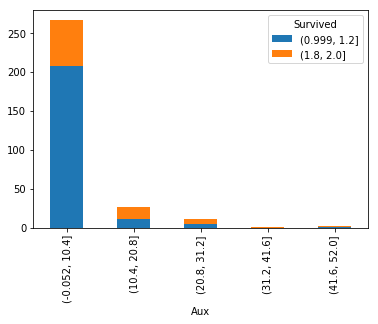

In [41]:
nodes_and_survival.plot(kind='bar', stacked=True, legend=True);

In [31]:
year_and_survival = pd.crosstab(years_bins, survival_bins)
year_and_survival

Survived,"(0.999, 1.2]","(1.8, 2.0]"
Year,,
"(57.989, 60.2]",66,25
"(60.2, 62.4]",39,10
"(62.4, 64.6]",45,16
"(64.6, 66.8]",37,19
"(66.8, 69.0]",38,11


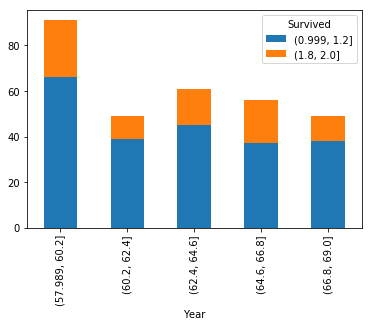

In [37]:
year_and_survival.plot(kind='bar', stacked=True, legend=True);

In [20]:
# some tables, cross tabs etc
age_and_nodes = pd.crosstab(age_bins, nodes_bins)
age_and_nodes


Aux,"(-0.052, 10.4]","(10.4, 20.8]","(20.8, 31.2]","(31.2, 41.6]","(41.6, 52.0]"
Age,,,,,
"(29.947, 40.6]",38,3,2,0,0
"(40.6, 51.2]",85,11,2,0,1
"(51.2, 61.8]",83,7,4,1,1
"(61.8, 72.4]",51,5,3,0,0
"(72.4, 83.0]",9,0,0,0,0


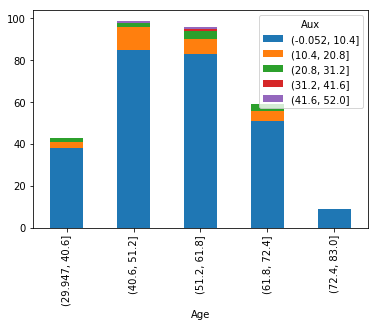

In [38]:
age_and_nodes.plot(kind='bar', stacked=True, legend=True);

In [28]:
age_and_survived = pd.crosstab(age_bins, survival_bins)
age_and_survived

Survived,"(0.999, 1.2]","(1.8, 2.0]"
Age,,
"(29.947, 40.6]",39,4
"(40.6, 51.2]",68,31
"(51.2, 61.8]",69,27
"(61.8, 72.4]",43,16
"(72.4, 83.0]",6,3


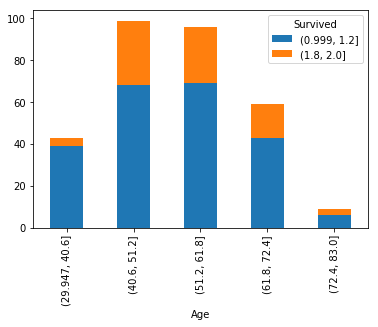

In [39]:
age_and_survived.plot(kind='bar', stacked=True, legend=True);

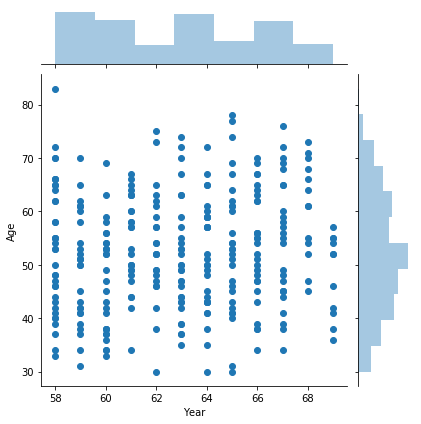

In [26]:
sns.jointplot(df_newtitles['Year'], df_newtitles['Age']);

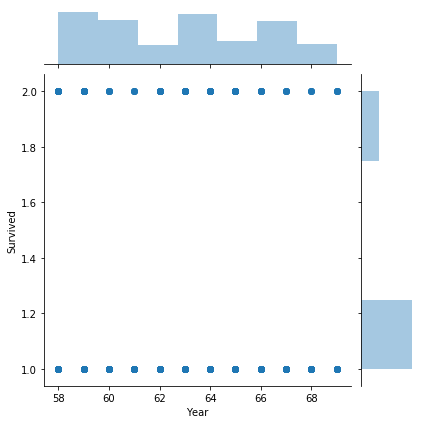

In [34]:
sns.jointplot(df_newtitles['Year'], df_newtitles['Survived']);

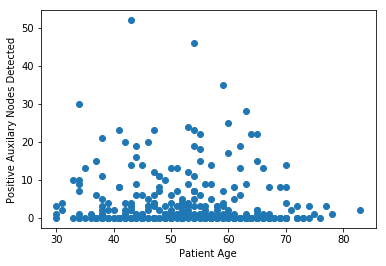

In [18]:
plt.scatter(df_with_headers['Patient_Age'], df_with_headers['Aux_Nodes_Detected']);
plt.xlabel('Patient Age')
plt.ylabel('Positive Auxilary Nodes Detected')
plt.show()

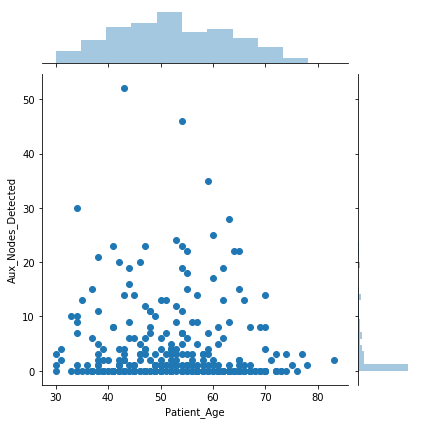

In [45]:
sns.jointplot(df_with_headers['Patient_Age'], df_with_headers['Aux_Nodes_Detected']);

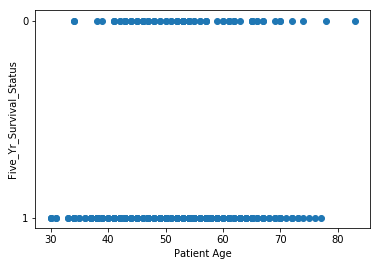

In [19]:
plt.scatter(df_with_headers['Patient_Age'], df_with_headers['Five_Yr_Survival_Status']);
plt.xlabel('Patient Age')
plt.ylabel('Five_Yr_Survival_Status')
plt.show()

## My top two Tables and Visuals from Experimenting

In [42]:
nodes_and_survival = pd.crosstab(nodes_bins, survival_bins)
nodes_and_survival

Survived,"(0.999, 1.2]","(1.8, 2.0]"
Aux,,
"(-0.052, 10.4]",208,58
"(10.4, 20.8]",11,15
"(20.8, 31.2]",5,6
"(31.2, 41.6]",0,1
"(41.6, 52.0]",1,1


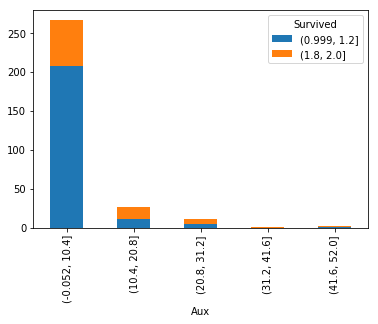

In [43]:
nodes_and_survival.plot(kind='bar', stacked=True, legend=True);

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.


Answers:


1. One Feature that definitely appeared to have a positive relationship with Survival was having a low number of Positive Auxiliary Nodes(the lowest range in our data was 0 - 10.4). The dowside to this however, was that whilst having a low amount of these Positive Auxiliary Nodes detected was correlated with survial, this range of Positive Auxiliary Nodes were also the most likely to have undergone the surgery and thus have the ailment in the first place. It makes sense because upon further research into breast cancer, once the cancer has started spreading to lymph nodes that is when it has entered its 'agressive' stages. 

This could be improved by creating more bins and thus seeing further how the distribution within the lower end of the range of lymph nodes was correlated with survival. 




2.




3.